# Implementing CLARA

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import copy
import random

In [23]:
#LOADING DATA
df = pd.read_csv('IPL.csv')
df = df.rename(columns={"one": "x", "two": "y"})

In [24]:
#DATAFRAME TO LIST
data = df.values

#DISPLAYING TOP ROWS
rows = data[1:6, :]
print(rows)

[[0.97918822 0.07715065]
 [0.50457661 0.55311441]
 [0.0581324  0.52809798]
 [0.77534302 0.21792169]
 [0.55042383 0.47085982]]


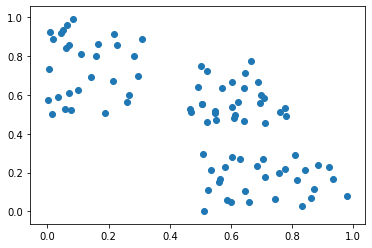

In [25]:
#INITIAL PLOT
plt.scatter(*zip(*data)) 
plt.show()

In [39]:
medoids = list()
k = 3
iterations = 40
used_ids = set()
def initialization():
    np.random.seed(20)

    for i in range(k):
        rand_items = np.random.randint(len(sample))
        while rand_items in used_ids:
            rand_items = np.random.randint(len(sample))
        used_ids.add(rand_items)
        medoids.append(data[rand_items])

    print("medoids: ", medoids)

    return medoids

In [40]:
initialization()

medoids:  [array([0.0581324 , 0.52809798]), array([0.50457661, 0.55311441]), array([0.77534302, 0.21792169])]


[array([0.0581324 , 0.52809798]),
 array([0.50457661, 0.55311441]),
 array([0.77534302, 0.21792169])]

In [30]:
def euclidean_distance(x1, x2, y1, y2):

    squared_distance = 0

    squared_distance = (x1 - x2)**2 + (y1 - y2)**2

    ed = np.sqrt(squared_distance)

    return ed;

In [31]:
def get_distance(data,medoids):
    distance = []
    for i in data:
        d2=[]
        for j in medoids:
            dis= Euclidean_distance(i[0],j[0],i[1],j[1])
            d2.append(dis)
        distance.append(d2)
    return distance

In [32]:
distance = get_distance(data,medoids)
print("data: ", data)
print("distance: ", distance)

data:  [[2.27679824e-01 8.58204148e-01]
 [9.79188216e-01 7.71506500e-02]
 [5.04576605e-01 5.53114414e-01]
 [5.81324010e-02 5.28097980e-01]
 [7.75343018e-01 2.17921690e-01]
 [5.50423831e-01 4.70859815e-01]
 [4.57865400e-02 9.18578950e-01]
 [5.85769942e-01 5.80322550e-02]
 [7.09072174e-01 5.81873662e-01]
 [1.85039300e-02 8.86522919e-01]
 [8.86065074e-01 2.39564016e-01]
 [6.03638732e-01 6.65583852e-01]
 [6.94229840e-02 8.58127672e-01]
 [6.04738741e-01 2.78109585e-01]
 [7.58989122e-01 5.12026775e-01]
 [8.49750790e-02 9.91122460e-01]
 [6.44285855e-01 1.07302113e-01]
 [6.03312586e-01 5.36479261e-01]
 [3.56326820e-02 5.87473821e-01]
 [6.00717946e-01 4.65607000e-02]
 [6.43430505e-01 4.64619821e-01]
 [5.59105700e-03 7.32527695e-01]
 [6.57500448e-01 5.02519910e-02]
 [6.11905662e-01 4.95265641e-01]
 [1.34451980e-02 5.01685431e-01]
 [7.43527346e-01 6.38661230e-02]
 [6.46466202e-01 7.14836519e-01]
 [2.94408193e-01 6.98651842e-01]
 [9.20220777e-01 2.26375771e-01]
 [6.08679544e-01 4.78632477e-01]
 [1

In [33]:
def swapping_cost(medoid_distances):
    summation = 0
    for i in medoid_distances:
        summation += min(i)
    return summation

In [34]:
print(swapping_cost(distance))

16.37790797834566


In [37]:
def get_min(distance):
    ind=[]
    for i in distance:
        ind.append(i.index(min(i)))
    return ind

In [38]:
min_indexes = get_min(distance)
print(min_indexes)

[0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1]


In [74]:
def generate_medoids(data):
    iteration = 20
    distance = get_distance(data,medoids)
    cost=swapping_cost(distance)
    med = medoids.copy()
    for iterate in range(iteration):
        new_medoid = med.copy()

        new_med_point = random.choice(new_medoid)
        rand_point=random.choice(data)
        for i in range(len(new_medoid)):
            if np.any(new_medoid[i] == new_med_point):
                new_medoid[i] = rand_point

        new_distance=get_distance(data,new_medoid)
        new_cost= swapping_cost(new_distance)

        if new_cost - cost < 0:
            cost= new_cost
            med = new_medoid.copy()

    return med,cost

In [75]:
print(generate_medoids(data))

([array([0.28369001, 0.80010687]), array([0.60331259, 0.53647926]), array([0.758129  , 0.19708612])], 14.681805942185587)


In [90]:
def clara_pam(k,sample_size,data,iteration):
    costs=[]
    indexs=[]
    max_iter=40
    for i in range(max_iter):
        randpoints=[]
        for i in range(sample_size):
            randp=random.choice(data)
            if len(randpoints) > 1:
                if np.any(randp not in randpoints):
                    randpoints.append(randp)

        index1,cost= generate_medoids(data)
        costs.append(cost)
        indexs.append(index1)

    mincost=min(costs)
    cos = costs.index(mincost)
    ind = indexs[cos]
    distance = get_distance(data,ind)
    ind= get_min(distance)
    return ind

In [91]:
k = 3
sample_size = 20
iteration = 40
ind = clara_pam(k,sample_size,data,iteration)
print("ind: ", ind)

ind:  [0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1]


In [93]:
def plot():
    fig =plt.figure(figsize=(5,5))
    col={0:'red',1:'blue',2:'yellow',3:'green',4:'cyan'}

    for i in range(len(data)):
        plt.scatter(data[i][0],data[i][1],color=col[ind[i]])

    plt.show()

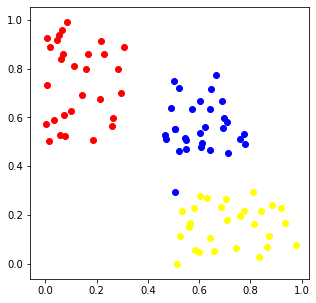

In [94]:
plot()